In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
from sklearn import svm
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
pca = PCA(n_components=2)
data= pca.fit(iris.data).transform(iris.data)

In [5]:
datamax = data.max(axis=0)+1
datamin = data.min(axis=0)-1

In [6]:
n = 200
X,Y = np.meshgrid(np.linspace(datamin[0], datamax[1],n), np.linspace(datamin[1], datamax[1], n))

In [7]:
X

array([[-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195],
       [-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195],
       [-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195],
       ..., 
       [-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195],
       [-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195],
       [-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
         2.22989048,  2.26249195]])

In [8]:
X.ravel()

array([-4.22520045, -4.19259898, -4.15999751, ...,  2.19728902,
        2.22989048,  2.26249195])

In [9]:
Y

array([[-2.37052404, -2.37052404, -2.37052404, ..., -2.37052404,
        -2.37052404, -2.37052404],
       [-2.34724255, -2.34724255, -2.34724255, ..., -2.34724255,
        -2.34724255, -2.34724255],
       [-2.32396106, -2.32396106, -2.32396106, ..., -2.32396106,
        -2.32396106, -2.32396106],
       ..., 
       [ 2.21592898,  2.21592898,  2.21592898, ...,  2.21592898,
         2.21592898,  2.21592898],
       [ 2.23921047,  2.23921047,  2.23921047, ...,  2.23921047,
         2.23921047,  2.23921047],
       [ 2.26249195,  2.26249195,  2.26249195, ...,  2.26249195,
         2.26249195,  2.26249195]])

In [10]:
Y.ravel()

array([-2.37052404, -2.37052404, -2.37052404, ...,  2.26249195,
        2.26249195,  2.26249195])

In [11]:
svc = svm.SVC()
svc.fit(data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])

In [13]:
Z

array([2, 2, 2, ..., 2, 2, 2])

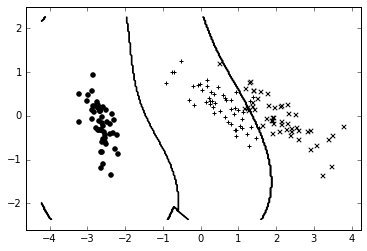

In [14]:
plt.contour(X, Y, Z.reshape(X.shape),colors="k")
for c, s in zip([0,1,2], ["o", "+", "x"]):
    d = data[iris.target == c]
    plt.scatter(d[:,0], d[:,1], c="k", marker=s)

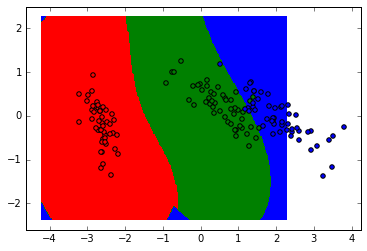

In [15]:
plt.contourf(X, Y, Z.reshape(X.shape),levels=[-0.5,0.5,1.5,2.5],colors=["r","g","b"])
for i, c in zip([0,1,2], ["r", "g", "b"]):
    d = data[iris.target == i]
    plt.scatter(d[:,0], d[:,1], c=c)

In [16]:
datamax = data.max(axis=0)+3
datamin = data.min(axis=0)-3
n = 200
X,Y = np.meshgrid(np.linspace(datamin[0], datamax[1],n), np.linspace(datamin[1], datamax[1], n))
Z = svc.predict(np.c_[X.ravel(),Y.ravel()])

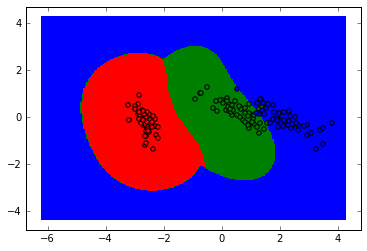

In [17]:
plt.contourf(X, Y, Z.reshape(X.shape),levels=[-0.5,0.5,1.5,2.5],colors=["r","g","b"])
for i, c in zip([0,1,2], ["r", "g", "b"]):
    d = data[iris.target == i]
    plt.scatter(d[:,0], d[:,1], c=c)